In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_json("data/train.jsonl", lines=True)

In [2]:
data = list(data["note"])

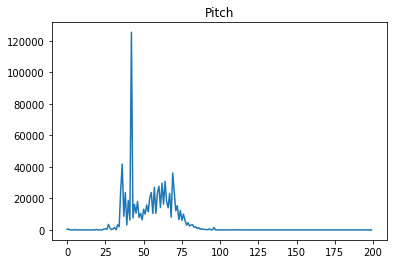

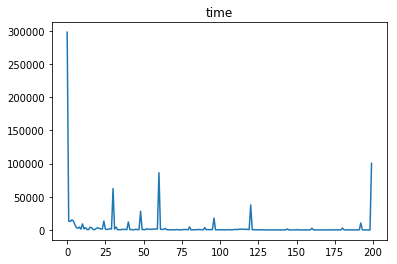

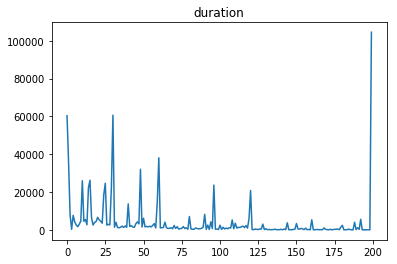

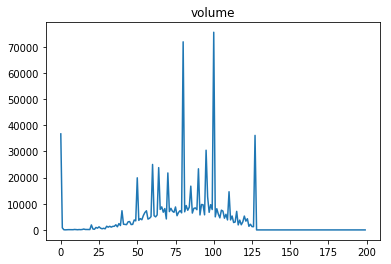

In [3]:
# concat all note into one list
con_data = np.asarray(sum([sum(d,[]) for d in data],[]))

calc_range = 200
con_data[con_data>=calc_range-1] = calc_range-1
n = con_data.shape[0]
result = []
for i, title in zip(range(4), ['Pitch', 'time', 'duration', 'volume']):
    v = con_data[:, i]
    oh = np.zeros((n, calc_range))
    oh[np.arange(n), v] = 1
    s = np.sum(oh, axis=0)
    result.append((s, title))
    plt.plot(np.arange(calc_range), s)
    plt.title(title)
    plt.show()

In [5]:
result[2][0][0] # #duration==0

60410.0

# Multinomial Distribution

In [12]:
import torch
from torch import multinomial
import config
from collections import Counter
import json

In [79]:
def load_notes(filename):
    with open(filename, 'r') as f:
        data = [json.loads(line) for line in f]
    notes = sum((d['note'] for d in data), [])
    note_count = Counter(notes)
    prob_list = torch.zeros(config.note.size)
    for nid, prob in dict(note_count).items():
        prob_list[nid] = prob
    return torch.LongTensor(notes), prob_list/prob_list.sum()
def multinomial_predict(prob, tar, n):
    predict = multinomial(prob, n*len(tar), replacement=True).view(n, len(tar))
    return (predict == tar.unsqueeze(0).expand_as(predict)).sum()/len(tar)/n

In [80]:
tnote, tprob = load_notes('data/train.jsonl')
vnote, vprob = load_notes('data/valid.jsonl')

In [81]:
multinomial_predict(tprob, vnote, 10000)

0.004417740307795812

In [82]:
multinomial_predict(tprob, tnote, 3500)

0.004228794533918985

# Most Possible note

In [84]:
tprob.sort()

(
 1.00000e-02 *
   0.0000
   0.0000
   0.0000
     ⋮   
   1.5178
   1.5520
   3.8783
 [torch.FloatTensor of size 4537], 
  1280
  1281
  1276
   ⋮  
     6
   509
   510
 [torch.LongTensor of size 4537])

In [86]:
vprob.sort()

(
 1.00000e-02 *
   0.0000
   0.0000
   0.0000
     ⋮   
   1.4423
   2.4262
   4.3016
 [torch.FloatTensor of size 4537], 
  2793
  2791
  2805
   ⋮  
  2778
   509
   510
 [torch.LongTensor of size 4537])

In [71]:
config.note.id2note[510]
# pitch, time, duration, volume

(42, 0.0, 1.5, 100)